## 1. Headers and Imports

In [1]:
# Computational Libraries
import tensorflow as tf
import numpy as np
import pandas as pd

# Preprocesing Libraries
from sklearn.preprocessing import StandardScaler

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Metric Libraries
from sklearn.metrics import classification_report

%matplotlib inline

## 2. Importing Data

In [2]:
dataset_train = pd.read_csv("./Dataset/titanic/train.csv")
dataset_test  = pd.read_csv("./Dataset/titanic/test.csv")
df = dataset_train.copy()

print(f"This Titanic Train Dataset has {dataset_train.shape[0]} rows and {dataset_train.shape[1]} columns")
print(f"This Titanic Test Dataset has {dataset_test.shape[0]} rows and {dataset_test.shape[1]} columns")
dataset_train.head()

This Titanic Train Dataset has 891 rows and 12 columns
This Titanic Test Dataset has 418 rows and 11 columns


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- The target varible is Suvived

## 3. Data check and Cleaning

### 3A & 3B. Initial Observations and Verification of datatypes

In [3]:
# Initial Observations on Dataset
print('Initial Observations\n--------------------')
print('Number of observations = {0}\nNumber of Features = {1}'.format(df.shape[0],df.shape[1]))
print('Columns :',list(df.columns),"\n")

# Verification of datatypes
print('Datatypes\n---------')
print(df.dtypes)

Initial Observations
--------------------
Number of observations = 891
Number of Features = 12
Columns : ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'] 

Datatypes
---------
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


### <font color=green>✓ The datatypes are assigned properly</font>
1. object - corresponds to string datatype
2. int64  - corresponds to integer datatype


 ### 3C. Hunt For Missing Values

In [4]:
# Hunt For Missing Values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### <font color=orange>There's missing data in the dataset</font>

### 3D. Check for duplicate Observations

In [5]:
# Check for duplicate Observations
df.duplicated().sum()

0

### 3E. Finding Unique values

In [6]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

Out of the dataset
- Categorical Features : Name, Sex, Ticket, Cabin, Embarked
- Numerical Features : PassengerId, Survived, Pclass, Age, SibSp, Parch, Fare

Out of the dataset useful features are
- Useful Features (Numerical) : Pclass, Age, SibSp, Parch, Fare
- Useful Features (Categorical) : Sex, Embarked
- **Prediction Features : Survived**

Useful Features With Missing Values 
- Numerical : Age (Will be replaced with Median)
- Categorical : Embarked (Will be replaced with Mode)

### 3F. Dropping Not Useful Columns

In [7]:
df.drop(columns = ["Name","Ticket","Cabin","PassengerId"],inplace = True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


### 3G. Handling Missing Values

In [8]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df.dropna(subset = ["Embarked"], inplace = True)

In [9]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,28.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [10]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

### 3H. Feature Encoding

In [11]:
dataset_train_preprocessed = pd.get_dummies(df, columns=["Sex", "Embarked"])
dataset_train_preprocessed.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


## 4. EDA

In [12]:
dataset_train_preprocessed.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,29.315152,0.524184,0.382452,32.096681,0.350956,0.649044,0.188976,0.086614,0.724409
std,0.486260,0.834700,12.984932,1.103705,0.806761,49.697504,0.477538,0.477538,0.391710,0.281427,0.447063
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000


### 4.1 . Data Scaling

In [13]:
# features = dataset_train_preprocessed[["Fare"]]
# scaler = StandardScaler()

# index = ["Fare"]
# features_ = scaler.fit_transform(features)
# features_scaled = pd.DataFrame(features_, columns = index)

# dataset_train_preprocessed[index] = features_scaled
# dataset_train_preprocessed.head()

### 4.2 Heat Map

Text(0.5, 1.0, 'Correlation Heatmap')

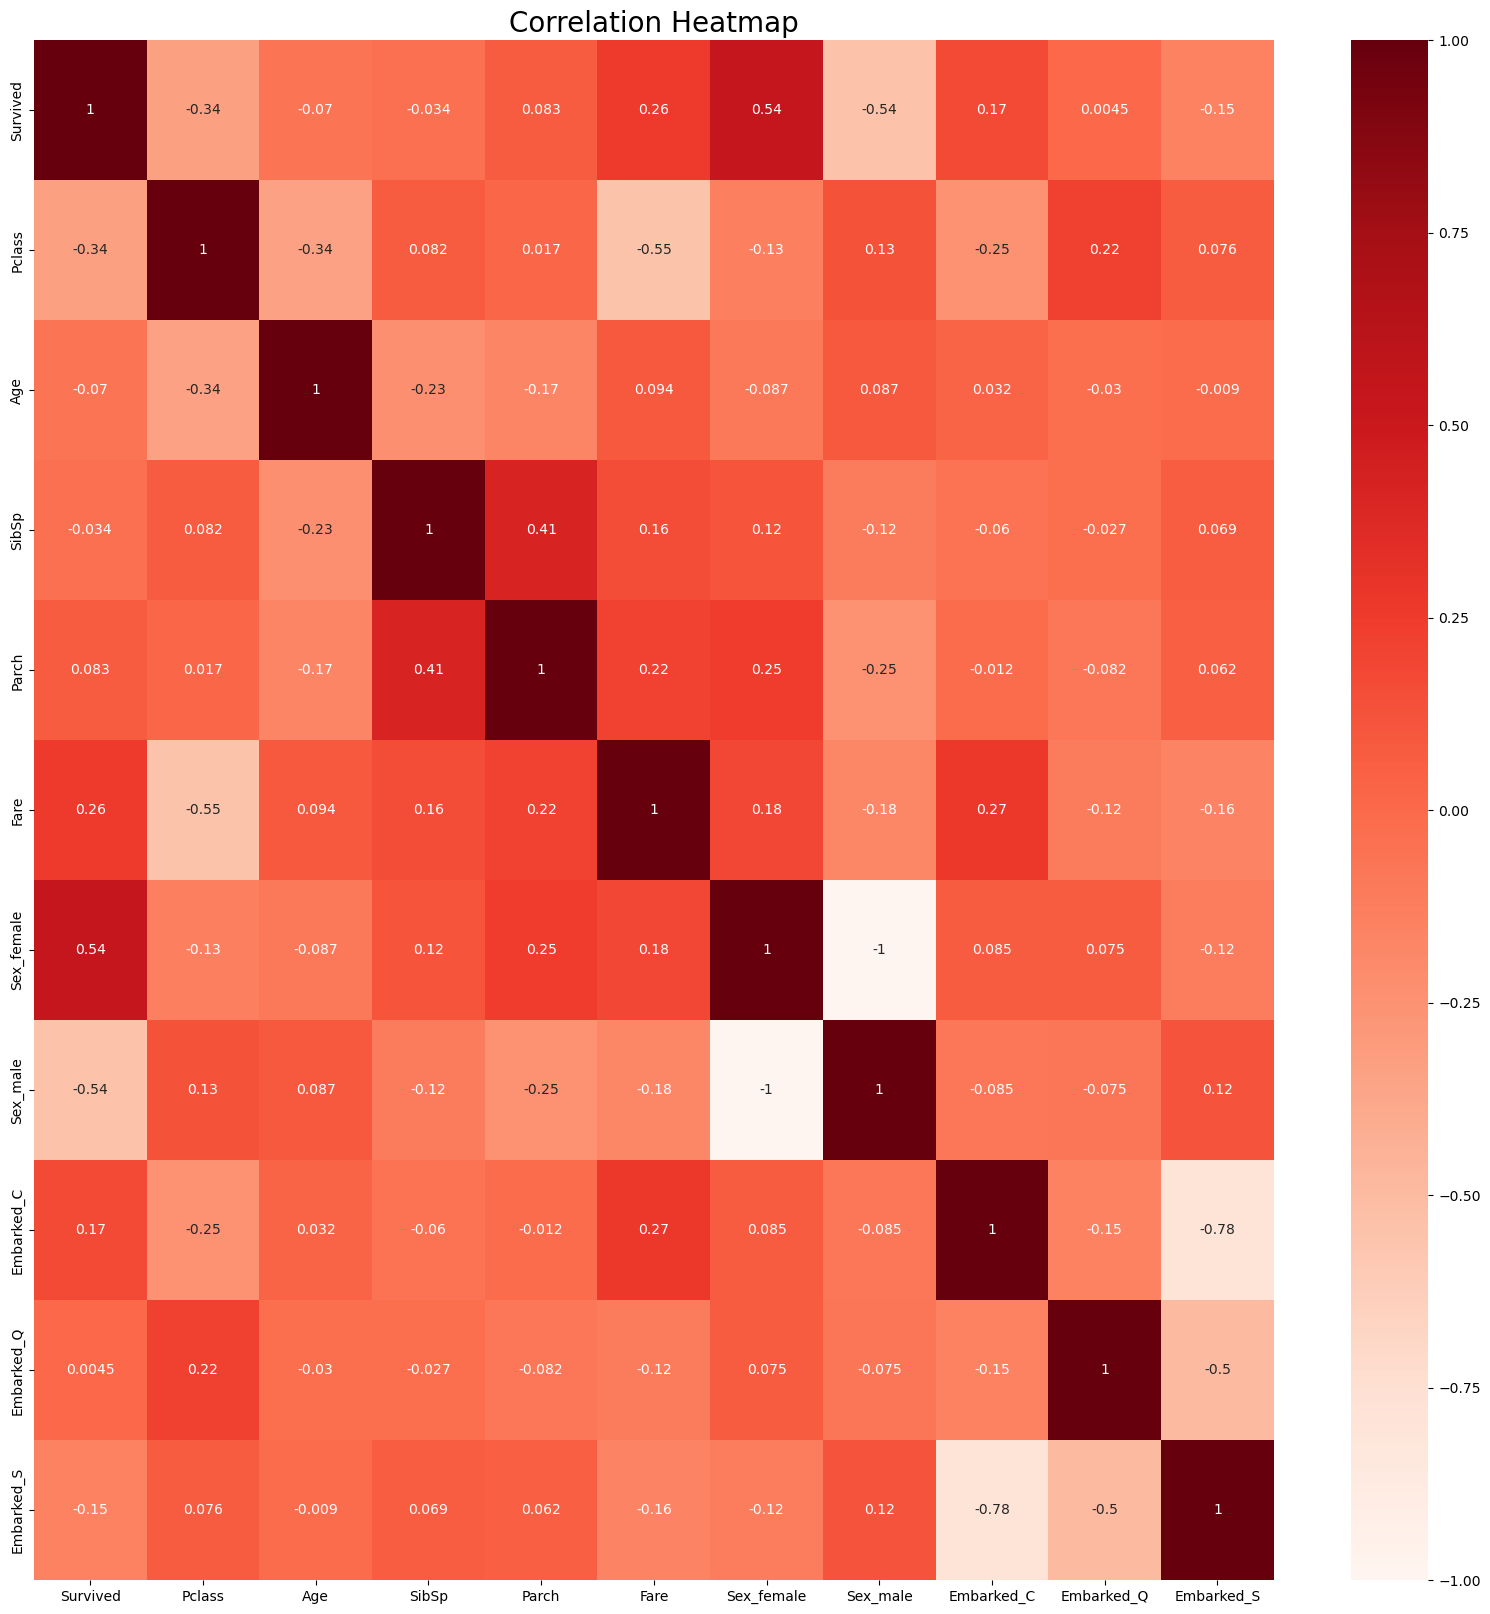

In [14]:
# Heat maps
corr = dataset_train_preprocessed.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True, cmap="Reds")
plt.title('Correlation Heatmap', fontsize=20)

- Not Much Correlation is observed
### <font color=green>✓ The dataset is Pre-Processed and ready to be sent for Modelling</font>

### 5. Saving the Data as CSV

In [15]:
dataset_train_preprocessed.to_csv("./Processed_Data/titanic/train.csv", mode='w', index=False)